# **1. animtaion概述**
matplotlib 在 1.1 版本的标准库中加人了动画模块——animation，使用该模块的Animtion 类可以实现一些基本的动画效果。Animtion 类是一个动画基类，它针对不同的行为分别派生了不同的子类，**主要包括 FuncAnimation 类和 AritistAnimation 类**。  
其中，Funcanimation类表示基于重复调用一个函数的动画，AritistAnimation 类表示基下一组固定Amrtis（标准的绘画元素，比如文本、线条、知形等)对象的动画。  
具体说明加下。

# **2. FuncAnimation类**
FuncAnimation是基于函数的动画类，它通过重复调用同一函数来制作动画。 FuncAnimation类的构造方法的语法格式如下所示：
>```python 
>FuncAnimation (fig, func, frames=None, init_func=None, fargs=None,
            save_count=None, *, cache_frame_data=True, **kwargs)
>```


**该方法常用参数的含义如下：** 
*fig：表示动画所在的画布。  
*func：表示每帧动画调用的函数。   
*frames：表示动画的长度(一次动画包舍的倾数)。     
*init_func：表示用于开始绘制帧的函数，它会在第一帧动画之前调用一次。若未设置该参数，则程序将使用 fames 序列中第一项的绘图结果。  
*fargs：表示传递给 func 函数的其他参数。  
*interval：表示更新动画的频率，以毫秒为单位，默认为 200。  
*blit：表示是否更新所有的点，默认为 Fale。官方推荐将 blit 参数设为True，但建议macOS的用户将 blit 参数设为 False，否则将无法显示动画。  

##  **2.1 FuncAnimation类，动画生成抛物线例子**
主要使用的是 matplotlib.animation ，具体代码如下：

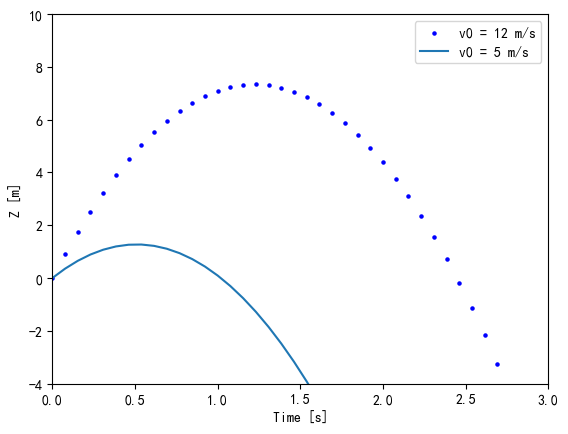

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t
 
v02 = 5
z2 = g * t**2 / 2 + v02 * t
 
scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()
 
 
def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)
 
 
anim = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
anim.save("test.gif", writer='pillow') # save a gif
plt.show()

生成动画效果：  
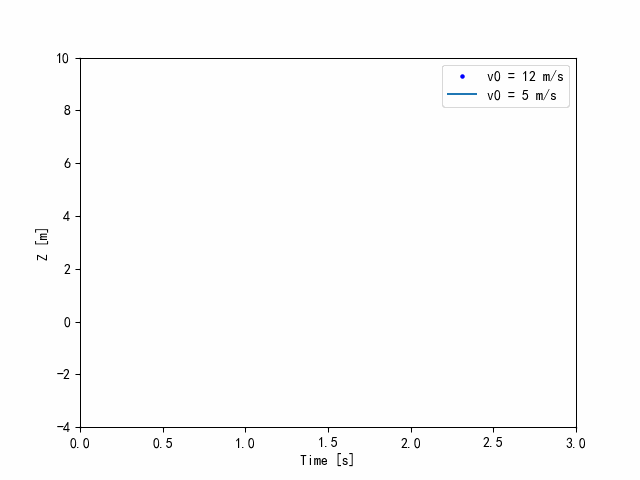

##  **2.2 FuncAnimation类，动画生成正弦曲线例子**  
绘制一个具有动画效果的图表，具体要求如下：  
（1） 绘制一条正弦曲线；  
（2） 绘制一个红色圆点，该圆点最初位于正弦曲线的左端；  
（3） 制作一个圆点沿曲线运动的动画，并时刻显示圆点的坐标位置。  
(具体效果参考运行结果gif图)  

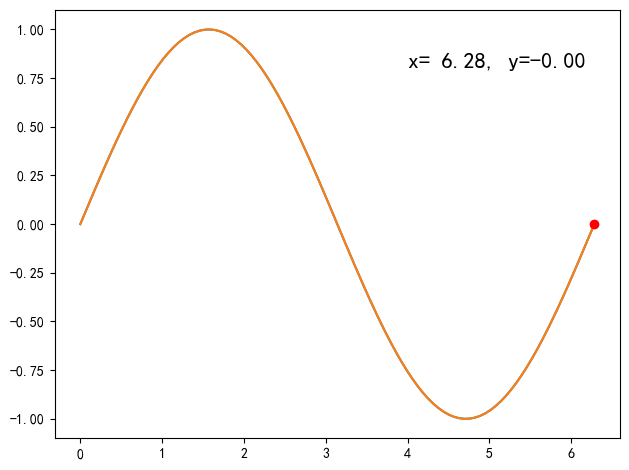

In [9]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 0. 设置中文黑体
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 1. 准备正弦曲线数据
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# 2. 创建画布和坐标系
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot(111)

# 3. 绘制正弦曲线
ax.plot(x, y)


# 4. 动画设计

def update_points(num):
    point_ani.set_data([x[num]], [y[num]])  # num代表当前动画第几帧
    text_pt.set_text("x={0:5.2f}, y={1:5.2f}".format( x[num], y[num]))
    return point_ani, text_pt,


x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
point_ani, = plt.plot(x[0], y[0], "ro")
text_pt = plt.text(4, 0.8, '', fontsize=16)

# 开始制作动画
ani = animation.FuncAnimation(fig, update_points, np.arange(0, 100), interval=100, blit=True)

# 5.将动画保存为gif图片（用于上传博客）
ani.save("pratice7.3.gif", writer='pillow')

# 6.展示图表
plt.show()


# **3. AritistAnimation类**
ArtistAnimation是基于一组Atist对象的动画类，它通过一帧一帧的数据制作动画。ArtislAnimation类的构造方法的语法格式如下所示：
>```python
>ArtistAnimation(fig,artists,interval,repeat_delay，repeat,
>                blit，*args，**kwargs)
>```               


该方法常用参数的含义如下。  
*fig：表示动画所在的画布。  
*artists：表示一组Artist 对象的列表。  
*interval：表示更新动画的频率，以毫秒为单位，默认为 200。  
*repeat_delay：表示再次播放动画之前延迟的时长。  
*repeat：表示是否重复播放动画。  
**注意：**
若希望将动画存储为视频文件，则可以借助ffmpeg或mencoder，之后使用Animation类的save()方法将每一帧动画存储为视频文件，具体示例如下。
>```python
>ni.save('basic_animation.mp4',fps=30,extra_args=['-vcodec','libx264'])
>```


## **3.1 AritistAnimation例题：**
绘制一个具有动画效果的图表，具体要求如下：  
（1） 绘制一条正弦曲线；  
（2） 绘制一个红色圆点，该圆点最初位于正弦曲线的左端；  
（3） 制作一个圆点沿曲线运动的动画，并时刻显示圆点的坐标位置。  
(具体效果参考运行结果gif图)  

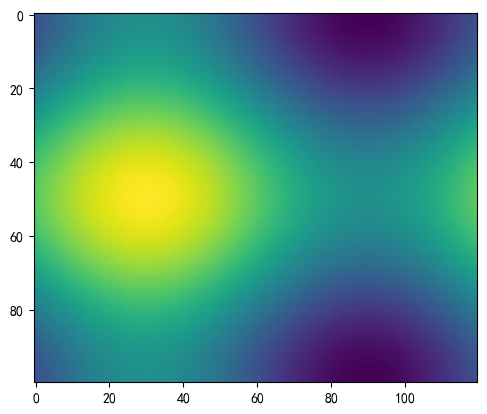

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = [] # 图片序列
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im]) # 每张图片都用单独list的形式加入到图片序列中

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')
ani.save("dynamic_images.gif", writer='pillow')

plt.show()